In [283]:
library(tidyverse)
library(dplyr)
library(repr)
library(ggplot2)
library(cowplot)
library(moderndive)
library(broom)
library(infer)
library(GGally)
library(AER)

library(tidyverse)
library(forcats)
library(repr)
library(broom)
install.packages("plot3D")
library(plot3D)

# data <- read_csv("Hackathon/data.csv")
# data


data <- read_csv("Hackathon/discussions.csv")
head(data)

set.seed(123)

also installing the dependency ‘misc3d’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message:
“no DISPLAY variable so Tk is not available”
Rows: 1611 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): actor_id, membership_role, post_id, post_parent_id, discussion_top...
dbl  (3): discussion_topic_message_length, post_message_length, count_of_likes
dttm (1): timestamp

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


actor_id,membership_role,timestamp,post_id,post_parent_id,discussion_topic_title,discussion_topic_id,discussion_topic_message_length,post_message_length,count_of_likes
<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
INSTRUCTOR,"[""Instructor""]",2033-01-18 17:13:01,e29fca96e5557a20cabec778dc885345,1e1288fa5e19f13c45b0231e8cbedab6,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,367,0,0
INSTRUCTOR,"[""Instructor""]",2033-01-18 17:13:02,cf6816ae103ab5e2c82d6595eb49e02e,1e1288fa5e19f13c45b0231e8cbedab6,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,0,0
LEARNER_3,"[""Learner""]",2033-01-28 06:55:40,abb6c24171f8b195cf0d050858e4ff18,cf6816ae103ab5e2c82d6595eb49e02e,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,564,0
LEARNER_11,"[""Learner""]",2033-01-29 01:04:32,a250f9cde1c58d4dba3d4f918e82a018,abb6c24171f8b195cf0d050858e4ff18,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,174,0
LEARNER_3,"[""Learner""]",2033-01-29 05:54:31,3ac8537702d3d7d8bf033d73a4491591,a250f9cde1c58d4dba3d4f918e82a018,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,226,0
INSTRUCTOR,"[""Instructor""]",2033-01-29 11:26:11,b4ef4eadc997992bfab83b11b50a3771,cf6816ae103ab5e2c82d6595eb49e02e,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,1566,2


In [200]:
counts_discussion <- data |>
        filter(actor_id != "INSTRUCTOR") |>
        group_by(actor_id, post_parent_id) |> 
        summarize(counts = n()) |>
        filter(counts != 1)
counts_discussion

`summarise()` has grouped output by 'actor_id'. You can override using the
`.groups` argument.


actor_id,post_parent_id,counts
<chr>,<chr>,<int>
LEARNER_11,d2337563336c64414c27878063c9a4f8,2
LEARNER_14,62adfea9fb43919a13b87b840aca0452,2
LEARNER_18,1c53b2d2f5d6a829c4a400b7a36c83c7,2
LEARNER_24,8a0cfed7b2d26411ea144c4f9515d245,2
LEARNER_30,50e7227bdd47a1acebb55a9cbc8cc037,2
LEARNER_37,75c1bd7db9d2f551d7a45aaf5173f70f,2
LEARNER_38,8a0cfed7b2d26411ea144c4f9515d245,2
LEARNER_38,ebc2fb88d9da05b2840b393af45ac165,2
LEARNER_5,1c53b2d2f5d6a829c4a400b7a36c83c7,2


In [201]:
data_2  <- read_csv("Hackathon/navigation_events.csv")
head(data_2)

Rows: 62839 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (13): id, type, action, session_id, object_id, membership_role, actor_i...
lgl   (9): ed_app, course_offering_id, statement_type, statement_version, ev...
dttm  (1): event_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,type,action,event_time,ed_app,course_offering_id,session_id,statement_type,statement_version,object_id,⋯,event__object_name,event__object_extensions_asset_name,event__object_extensions_asset_type,event__object_extensions_asset_subtype,event__object_extensions_entity_id,event__object_extensions_http_method,event__referrer,event__extensions_request_id,event__extensions_request_url,event__attachment_type
<chr>,<chr>,<chr>,<dttm>,<lgl>,<lgl>,<chr>,<lgl>,<lgl>,<chr>,⋯,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<lgl>,<lgl>,<lgl>,<chr>
a3bd94baaa440f4793ad08bb64ed3a8f,NavigationEvent,navigatedto,2033-03-27 03:08:48,NA,NA,f8eac5633f79de90a77b33338b14dd8e,NA,NA,0878d2f171deae54c6a81acc6ffeba20,⋯,attachment,file003.pdf,attachment,NA,NA,GET,NA,NA,NA,pdf
0f137ee4ff1b603e3c9de17c5dc9a1d2,NavigationEvent,navigatedto,2033-03-30 16:23:40,NA,NA,90d33cac1281c636931efa7646e1e1c3,NA,NA,0878d2f171deae54c6a81acc6ffeba20,⋯,attachment,file003.pdf,attachment,NA,NA,GET,NA,NA,NA,pdf
86109c5350e06d3d7fe0ec880f37193e,NavigationEvent,navigatedto,2033-03-25 12:57:06,NA,NA,2c3cdb1505e1c2dbf93d70b499668328,NA,NA,aa6bffb0a91e4f737a943dfddad70a7b,⋯,attachment,image006.png,attachment,NA,NA,GET,NA,NA,NA,png
da5b96f601b39f14e2cc7de59bea35b9,NavigationEvent,navigatedto,2033-03-20 15:57:10,NA,NA,bd87f5bcffda3d2f6de47cf02697f43b,NA,NA,aa6bffb0a91e4f737a943dfddad70a7b,⋯,attachment,image006.png,attachment,NA,NA,GET,NA,NA,NA,png
7959480d52ab4c94821c122e27a48cd3,NavigationEvent,navigatedto,2033-01-11 18:05:29,NA,NA,d5c5f36d8bc0ebc001c374f9daec961b,NA,NA,aa6bffb0a91e4f737a943dfddad70a7b,⋯,attachment,image006.png,attachment,NA,NA,GET,NA,NA,NA,png
5af6e58a6fccd299a8b0e016d4ca7784,NavigationEvent,navigatedto,2033-01-11 17:54:12,NA,NA,d5c5f36d8bc0ebc001c374f9daec961b,NA,NA,aa6bffb0a91e4f737a943dfddad70a7b,⋯,attachment,image006.png,attachment,NA,NA,GET,NA,NA,NA,png


In [362]:
counts <- data_2 |>
        filter(actor_id != "INSTRUCTOR") |>
        group_by(actor_id) |>
        summarize(counts = n())

counts <- arrange(counts, desc(actor_id))
# counts

pattern <- "^UNKN"
logical_vector <- grepl(pattern, counts$actor_id)

# Use the logical vector to subset the data frame
counts <- counts[!logical_vector, ]

# counts 
counts$actor_id <- sub("^LEARNER_", "", counts$actor_id)

# mean(counts$counts)


data <- read_csv("Hackathon/data.csv")





counts$actor_id <- as.numeric(counts$actor_id)

counts <- arrange(counts, desc(actor_id))
data <- arrange(data, desc(Student))

counts <- counts |> filter((actor_id < 38 | actor_id == 48) & actor_id != 32 & actor_id != 28 & actor_id != 9 & actor_id != 22)

all_data <- cbind(data, counts)
all_data <- all_data |> select(-actor_id)
all_data <- all_data |> slice(2:34)
head(all_data)

Rows: 34 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): Student, currentScore, engagement

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,Student,currentScore,engagement,counts
,<dbl>,<dbl>,<dbl>,<int>
1,37,82.3,862185,1092
2,36,70.9,135518,1377
3,35,79.1,209140,903
4,34,81.3,604326,673
5,33,72.1,547149,511
6,31,77.9,1011355,836


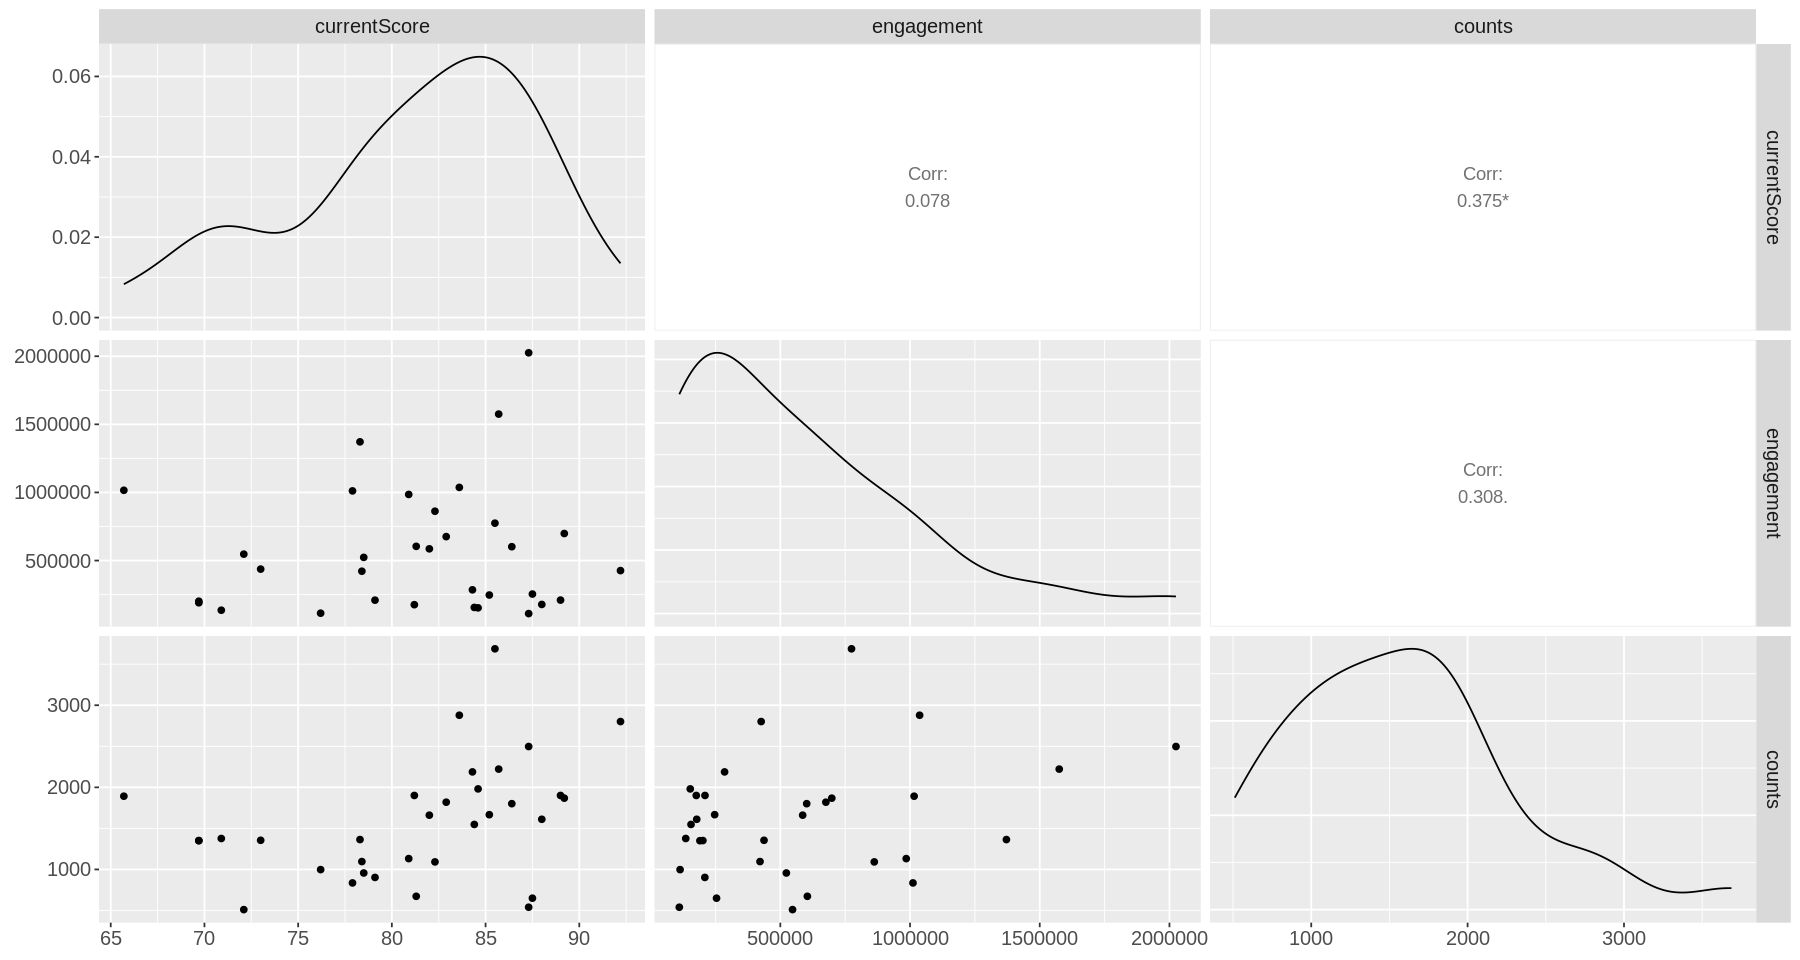

In [253]:
options(repr.plot.width = 15, repr.plot.height = 8)

canvas_data_plots <- all_data %>%
    select(-Student) |>
  ggpairs(progress = FALSE) +
  theme(
    text = element_text(size = 15),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )
canvas_data_plots

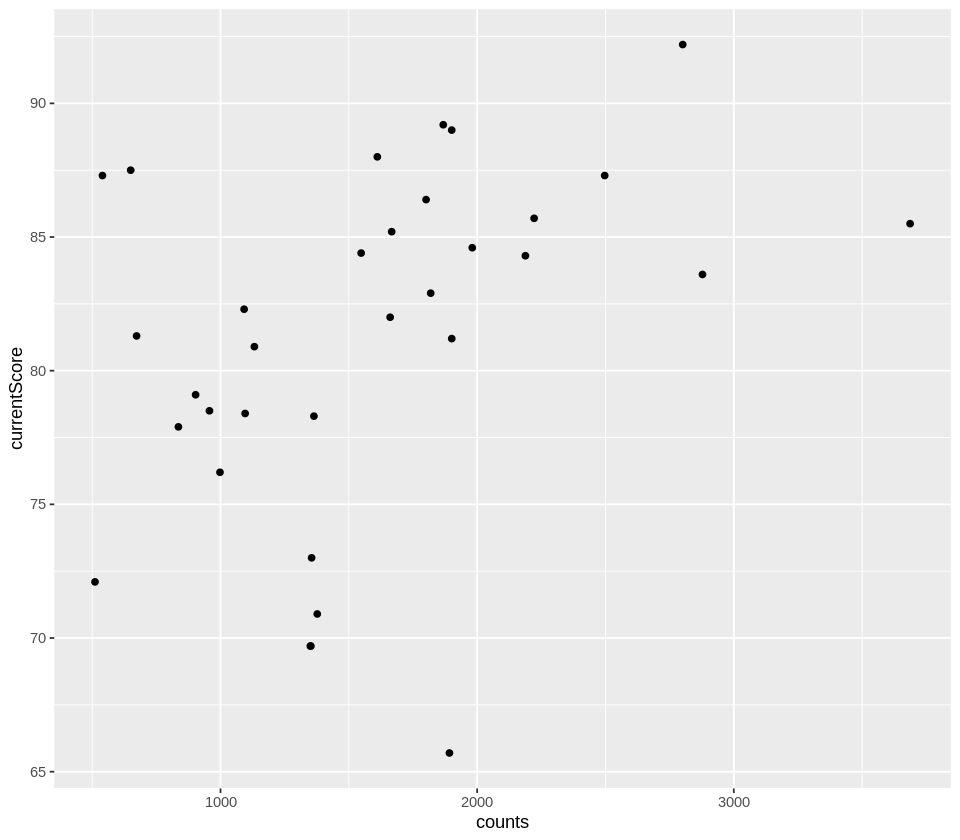

In [361]:
(plot <- all_data |> ggplot(aes(counts, currentScore)) +
                    geom_point())

In [204]:
scaled_all_data <- all_data |> 
   mutate(across(everything(), scale))
head(scaled_all_data)

,Student,currentScore,engagement,counts
,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
1,1.681996,0.16580219,0.63167491,-0.6788232
2,1.590853,-1.58629847,-0.93751377,-0.2816147
3,1.499711,-0.32601554,-0.77853199,-0.9422351
4,1.408568,0.01210915,0.07484568,-1.2627894
5,1.317425,-1.40186682,-0.04862421,-1.4885710
6,1.135140,-0.51044719,0.95379753,-1.0356140


In [277]:
data_cluster_k4 <- kmeans(scaled_all_data, centers = 4, nstart=100)
tidy(data_cluster_k4)

Student,currentScore,engagement,counts,size,withinss,cluster
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<fct>
1.0642514,-0.1142607,0.08800191,-1.0353043,9,13.771472,1
-0.3914991,0.6614622,1.69138317,1.7309083,4,9.471177,2
-0.7137534,0.5665019,-0.33556905,0.2855274,14,19.270115,3
0.3300468,-1.5914216,-0.47659720,-0.2672130,6,7.685548,4


In [278]:
tidy_data_cluster_k4 <- augment(data_cluster_k4, scaled_all_data)
head(tidy_data_cluster_k4)

Student,currentScore,engagement,counts,.cluster
"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>
1.681996,0.16580219,0.63167491,-0.6788232,1
1.590853,-1.58629847,-0.93751377,-0.2816147,4
1.499711,-0.32601554,-0.77853199,-0.9422351,1
1.408568,0.01210915,0.07484568,-1.2627894,1
1.317425,-1.40186682,-0.04862421,-1.4885710,1
1.135140,-0.51044719,0.95379753,-1.0356140,1


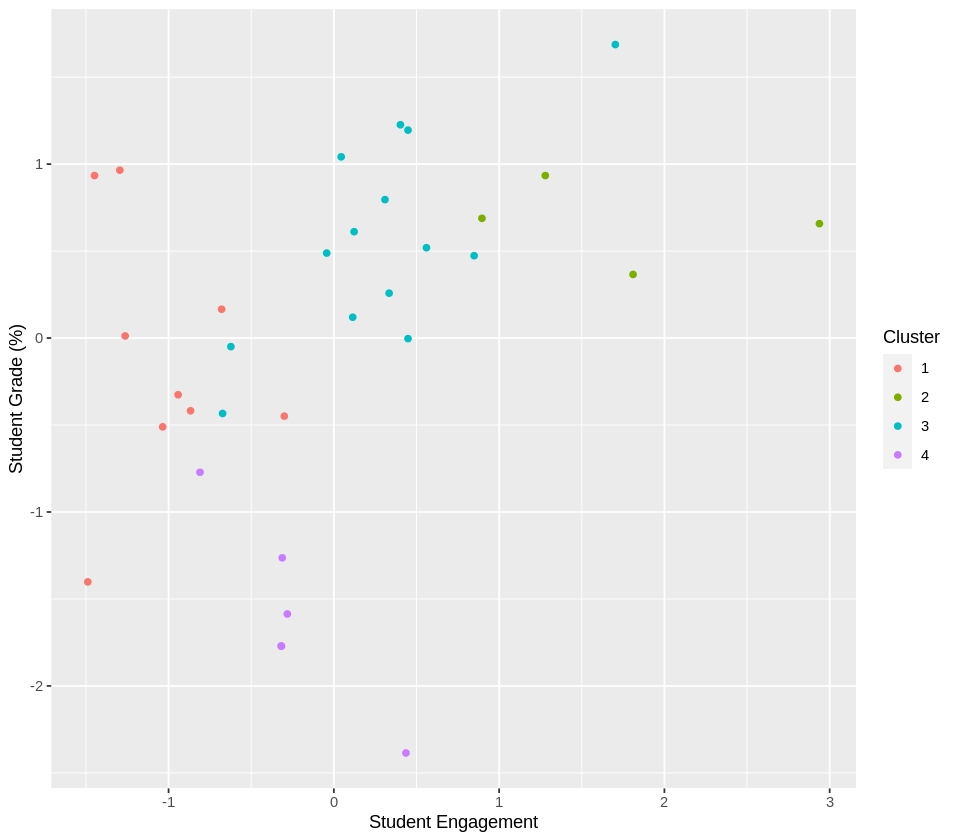

In [279]:
options(repr.plot.width = 8, repr.plot.height = 7)
(tidy_data_cluster_k4_plot <- ggplot(tidy_data_cluster_k4, aes(x = counts, y = currentScore, color = .cluster)) + 
                             geom_point() +
                             labs(x = "Student Engagement", y = "Student Grade (%)" , color = "Cluster"))

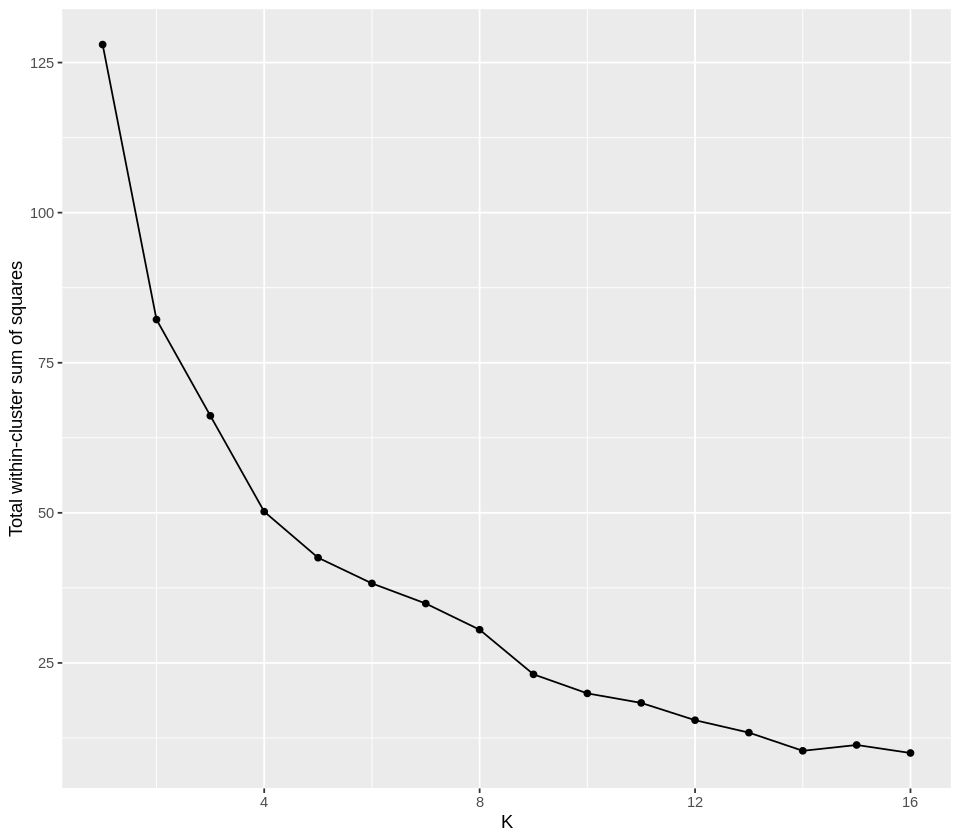

In [276]:
options(repr.plot.width = 8, repr.plot.height = 7)
canvas_ks <- tibble(k = 1:16)


canvas_clustering <- canvas_ks |>
    rowwise() |>
    mutate(models = list(kmeans(scaled_all_data, k)))


beer_model_stats <- canvas_clustering |> 
    mutate(model_statistics = list(glance(models)))

canvas_clustering_unnested <- beer_model_stats |> unnest(model_statistics)

(choose_canvas_k <- ggplot(canvas_clustering_unnested, aes(x = k, y = tot.withinss)) +
                 geom_point() +
                 geom_line() +
                 labs(x = "K", y = "Total within-cluster sum of squares"))

In [298]:


counts_more_work <- data_2 |>
        filter(actor_id != "INSTRUCTOR") |>
        group_by(actor_id, object_id) |>
        summarize(counts = n()) |> 
        ungroup() 


# counts

pattern <- "^UNKN"
logical_vector <- grepl(pattern, counts_more_work$actor_id)

# Use the logical vector to subset the data frame
counts_more_work <- counts_more_work[!logical_vector, ]

# counts 
counts_more_work$actor_id <- sub("^LEARNER_", "", counts_more_work$actor_id)



counts_more_work <- counts_more_work |> filter(!is.na(actor_id))
counts_more_work$actor_id <- as.numeric(counts_more_work$actor_id)

counts_more_work <- arrange(counts_more_work, desc(actor_id)) |> filter((actor_id < 38) & actor_id != 32 & actor_id != 28 & actor_id != 9 & actor_id != 22)

# counts_more_work
data_for_counts_more_work <- data |> mutate(actor_id = Student) |> select(-Student) |> filter(actor_id != 48)
# data_for_counts_more_work

concat <- merge(counts_more_work, data_for_counts_more_work)
head(concat)

`summarise()` has grouped output by 'actor_id'. You can override using the
`.groups` argument.


,actor_id,object_id,counts,currentScore,engagement
,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,1,0083641e2e8cf92a45d209350b12f797,1,80.9,985351
2,1,026a8682967aa34e43d682a51f743de0,5,80.9,985351
3,1,067f62cae2a61d43712cc7c84f1eb08a,4,80.9,985351
4,1,071ad0d80cbc232cf74b72681bc77abf,87,80.9,985351
5,1,0790ff605875f7393f9fde5c50c3eae4,2,80.9,985351
6,1,080b527f7d79996e80fed0022f7e7cf6,3,80.9,985351


In [300]:
# concat |> group_by(object_id, actor_id) |> summarize(count = nrow(object_id))

In [363]:
a <- data_2 |>
        filter(actor_id != "INSTRUCTOR") |>
        filter(!is.na(actor_id)) |>
        group_by(object_id, actor_id) |>
        summarize(counts = n()) |> 
        ungroup() |>
        select(-object_id)

a$actor_id <- sub("^LEARNER_", "", a$actor_id)



a <- a |> filter(!is.na(actor_id))
a$actor_id <- as.numeric(a$actor_id)

first_object <- a |> slice(1:37)

first_object <- merge(first_object, data_for_counts_more_work)
head(first_object)




`summarise()` has grouped output by 'object_id'. You can override using the
`.groups` argument.
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


,actor_id,counts,currentScore,engagement
,<dbl>,<int>,<dbl>,<dbl>
1,1,1,80.9,985351
2,2,28,84.6,152876
3,3,14,89.0,209706
4,4,6,82.9,675638
5,5,11,88.0,177844
6,6,35,92.2,426200


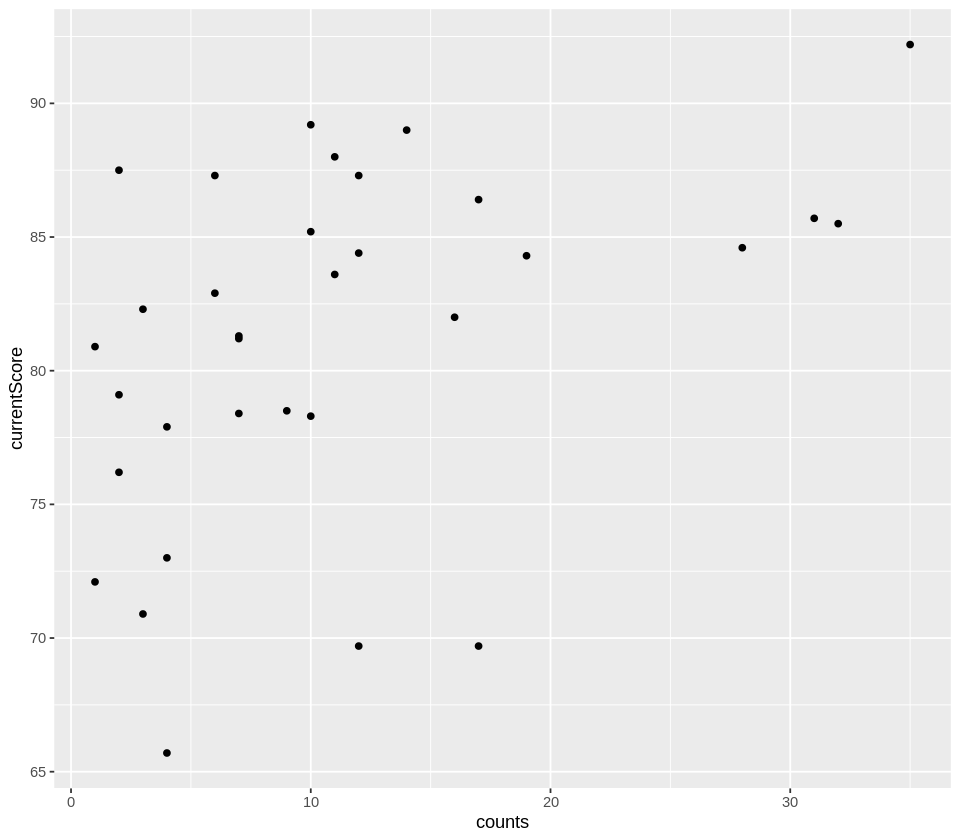

In [339]:
(plot <- first_object |> ggplot(aes(counts, currentScore)) +
                    geom_point())

In [366]:

scaled_first_object <- first_object |> 
   mutate(across(everything(), scale))


data_cluster_k4_first_object <- kmeans(scaled_first_object, centers = 4, nstart= 50)



tidy_data_cluster_k4_first_object <- augment(data_cluster_k4_first_object, scaled_first_object)

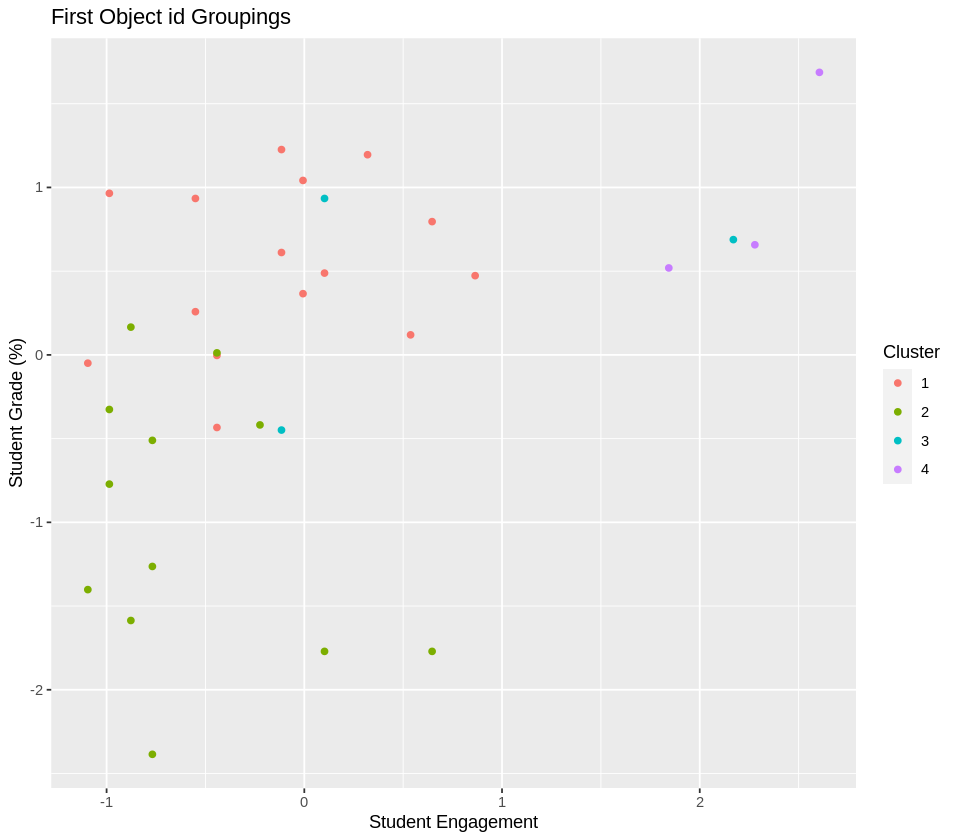

In [367]:
options(repr.plot.width = 8, repr.plot.height = 7)
(tidy_data_cluster_k4_plot <- ggplot(tidy_data_cluster_k4_first_object, aes(x = counts, y = currentScore, color = .cluster)) + 
                             geom_point() +
                             labs(x = "Student Engagement", y = "Student Grade (%)" , color = "Cluster", title = "First Object id Groupings"))

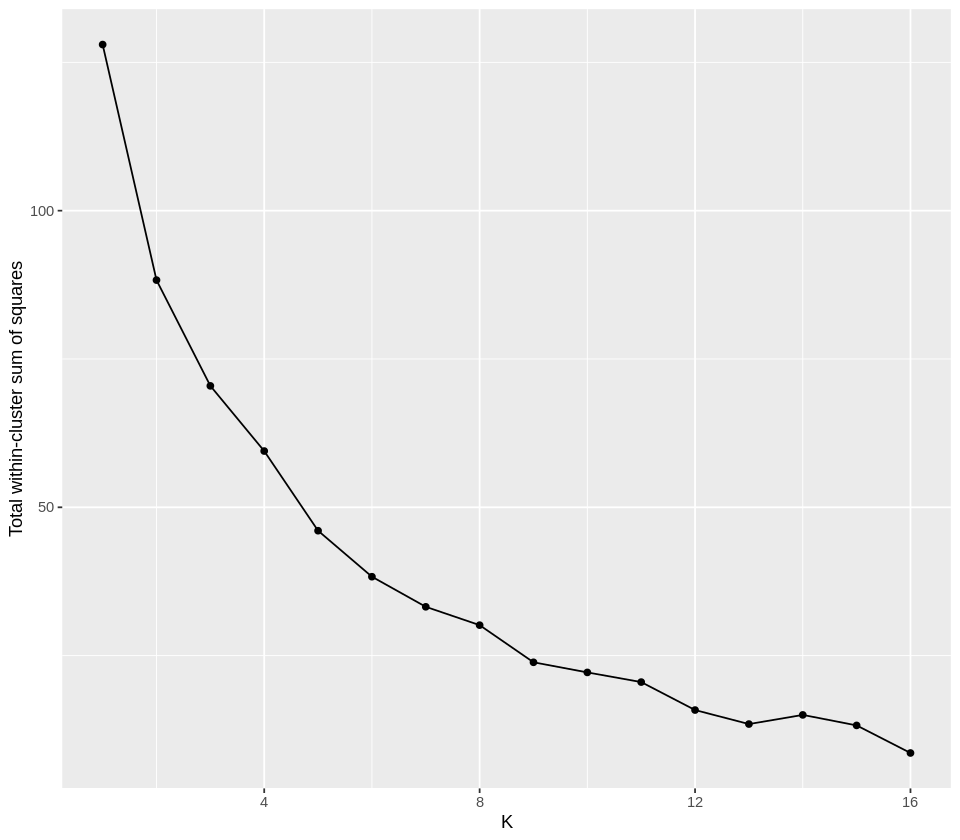

In [346]:
options(repr.plot.width = 8, repr.plot.height = 7)
canvas_ks <- tibble(k = 1:16)


canvas_clustering <- canvas_ks |>
    rowwise() |>
    mutate(models = list(kmeans(scaled_first_object, k)))


beer_model_stats <- canvas_clustering |> 
    mutate(model_statistics = list(glance(models)))

canvas_clustering_unnested <- beer_model_stats |> unnest(model_statistics)

(choose_canvas_k <- ggplot(canvas_clustering_unnested, aes(x = k, y = tot.withinss)) +
                 geom_point() +
                 geom_line() +
                 labs(x = "K", y = "Total within-cluster sum of squares"))